In [21]:
import sys
sys.path.append("../")

import datarun

import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import voigt_profile

In [3]:
data = datarun.Experiment(
    datapath="../data/mar30/linewidth/",
    idx_start=32,
    vstart=.3,
    vend=1.0,
    vstep=.175,
    numtrials=25,
    mask=.15
)

on 25: Found 2 blobs                                                            
on 29: Found 2 blobs                                                            
on 46: array must not contain infs or NaNs                                      
|████████████████████████████████████████| 125/125 [100%] in 4:41.6 (0.44/s)    


In [4]:
def od_max(run):
    return run.popt_x[0]-run.popt_x[3]

str_dat = data.structure_data(od_max)

In [5]:
for dat in str_dat.values():
    mean = np.mean(dat)
    std = np.std(dat)
    for val in dat:
        if np.abs(val - mean) > 2*std:
            dat.remove(val)
            print("removed")

removed
removed
removed
removed
removed
removed


In [63]:
def lorentzian(x, A, w0, gamma):
    return A*(gamma/(2*np.pi))/((x-w0)**2+gamma**2)

def gaussian(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2*sigma**2))

def voigt(x, A, mu, gamma, sigma):
    return A*voigt_profile(x-mu, sigma, gamma)

In [64]:
xdata = 59.25+np.array(data.vlist)*6.1*2

In [65]:
means = np.fromiter(map(np.mean, str_dat.values()), float)
errs = np.fromiter(map(np.std, str_dat.values()), float)/5
popt_g, pcov_g = curve_fit(gaussian, xdata, means, sigma = errs, p0 = [20, 60, 8], absolute_sigma=True)
popt_v, pcov_v = curve_fit(voigt, xdata, means, sigma = errs, p0 = [20, 60, 8, 8], absolute_sigma=True)
popt_l, pcov_l = curve_fit(lorentzian, xdata, means, sigma = errs, p0 = [20, 60, 8], absolute_sigma=True)

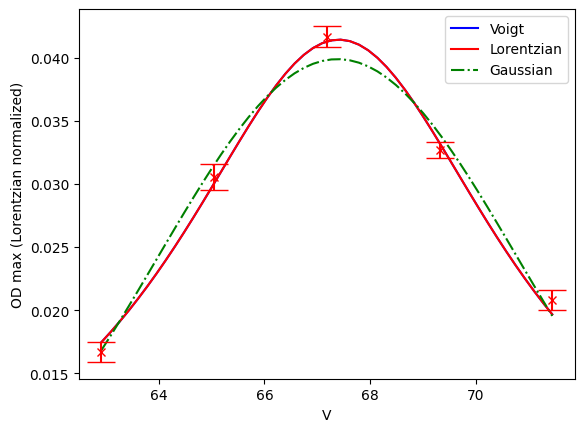

In [66]:
xax = np.linspace(min(xdata), max(xdata), 50)
plt.plot(xax, [voigt(x, *popt_v)/popt_l[0] for x in xax], color = "b", label = "Voigt")
plt.plot(xax, [lorentzian(x, *popt_l)/popt_l[0] for x in xax], color = "r", label = "Lorentzian")
plt.plot(xax, [gaussian(x, *popt_g)/popt_l[0] for x in xax], linestyle = "-.", color = 'g', label = "Gaussian")
plt.errorbar(xdata, means/popt_l[0], yerr = errs/popt_l[0], linestyle = "None", marker =  "x", color = "r", capsize=10)
plt.legend()
plt.ylabel("OD max (Lorentzian normalized)")
plt.xlabel(r"V")
#for dat in data.data:
#    plt.scatter(dat.value, od_max(dat)/popt_l[0], color = "k", alpha=.2, marker = "o")
plt.savefig("../figures/intensity1.png", dpi = 200)


In [67]:
popt_v

array([1.07983936e+03, 6.74106388e+01, 3.84104564e+00, 2.03163155e-04])

In [68]:
popt_l

array([2159.67688249,   67.41063822,    3.84104115])

In [53]:
popt_l[1]

67.41063845833334

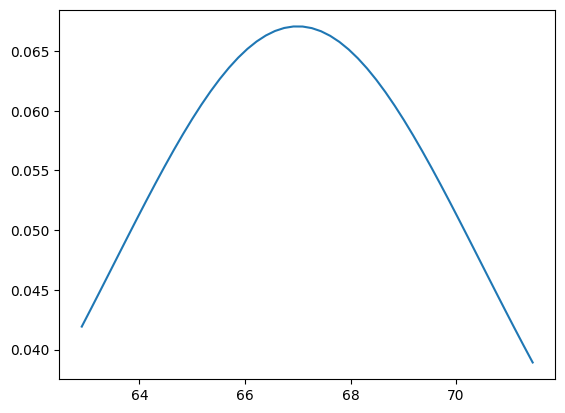

In [52]:
plt.plot(xax, voigt_profile(xax-67, 2, 4))

In [45]:
pcov_v

array([[6.92004394e+02, 2.89246025e-02, 1.03304564e+03, 2.88816560e+00],
       [2.89246025e-02, 6.70836185e-03, 7.95937868e+00, 7.12237874e-04],
       [1.03304564e+03, 7.95937868e+00, 2.86547429e+04, 3.15734263e+00],
       [2.88816560e+00, 7.12237874e-04, 3.15734263e+00, 1.64406459e-02]])